<a href="https://colab.research.google.com/github/raxor555/License-Plate-Detection/blob/main/License_Plate_Detecion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%%capture
!pip install ultralytics
# !pip install albumentations

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Import necessary libraries
import os
import shutil
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import cv2
import yaml
import torch
from PIL import Image
from IPython.display import display, Video
from ultralytics import YOLO
from collections import deque
import subprocess  # For executing ffmpeg

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [4]:
# Define dataset paths
train_dir = "/content/drive/MyDrive/License-Plate-Dataset/archive/images/train"
val_dir = "/content/drive/MyDrive/License-Plate-Dataset/archive/images/val"

# Define class names
classes = ["license_plate"]  # Add more classes if needed

# Create YAML content
data_yaml_content = f"""
train: {train_dir}
val: {val_dir}

nc: 1  # Number of classes
names: ['license_plate']  # Class names
"""

# Save to a file
yaml_path = "/content/drive/MyDrive/License-Plate-Dataset/archive/dataset.yaml"
with open(yaml_path, "w") as f:
    f.write(data_yaml_content)

# Display the content for verification
!cat {yaml_path}


train: /content/drive/MyDrive/License-Plate-Dataset/archive/images/train
val: /content/drive/MyDrive/License-Plate-Dataset/archive/images/val

nc: 1  # Number of classes
names: ['license_plate']  # Class names


In [5]:
model = YOLO("yolov8n.pt")

100%|██████████| 6.25M/6.25M [00:00<00:00, 64.4MB/s]


In [6]:
results = model.train(
    data="/content/drive/MyDrive/License-Plate-Dataset/archive/dataset.yaml",
    epochs=50,
    imgsz=640,
    lr0= 0.0005,
    batch=32,
    lrf=0.1,
    augment=True
)

Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/MyDrive/License-Plate-Dataset/archive/dataset.yaml, epochs=50, time=None, patience=100, batch=32, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=True, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_l

100%|██████████| 755k/755k [00:00<00:00, 18.9MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

100%|██████████| 5.35M/5.35M [00:00<00:00, 101MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/MyDrive/License-Plate-Dataset/archive/labels/train.cache... 1526 images, 2 backgrounds, 0 corrupt: 100%|██████████| 1528/1528 [00:00<?, ?it/s]

train: WARNING ⚠️ /content/drive/MyDrive/License-Plate-Dataset/archive/images/train/car-wbs-MH03AR5549_00000.jpg: corrupt JPEG restored and saved


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/drive/MyDrive/License-Plate-Dataset/archive/labels/val.cache... 169 images, 0 backgrounds, 0 corrupt: 100%|██████████| 169/169 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.0005' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      3.69G      1.043      2.163      1.074         43        640: 100%|██████████| 48/48 [05:27<00:00,  6.82s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:04<00:00,  1.34s/it]

                   all        169        169          1      0.242      0.749      0.543



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      4.67G     0.9275      1.131     0.9697         43        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.03it/s]

                   all        169        169      0.979      0.844      0.948      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      4.67G     0.9213     0.9088     0.9717         43        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.20it/s]


                   all        169        169      0.875      0.827      0.909       0.69

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      4.67G      0.923     0.7986      0.985         43        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all        169        169        0.9      0.882      0.955      0.723



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      4.67G      0.877     0.6676     0.9658         49        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all        169        169      0.974      0.953      0.987      0.726



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      4.68G     0.8488     0.6403     0.9621         57        640: 100%|██████████| 48/48 [00:33<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.24it/s]

                   all        169        169      0.942      0.941      0.979      0.779



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      4.68G     0.8614     0.6138     0.9609         38        640: 100%|██████████| 48/48 [00:35<00:00,  1.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all        169        169      0.994       0.95      0.976      0.764



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      4.68G     0.8095     0.5706     0.9406         45        640: 100%|██████████| 48/48 [00:37<00:00,  1.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.17it/s]

                   all        169        169       0.99      0.976      0.993      0.792



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      4.68G     0.7978     0.5559     0.9355         43        640: 100%|██████████| 48/48 [00:38<00:00,  1.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all        169        169      0.988      0.966      0.986      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      4.68G     0.7993     0.5436     0.9391         50        640: 100%|██████████| 48/48 [00:36<00:00,  1.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.37it/s]

                   all        169        169      0.994      0.973      0.994      0.736



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      4.69G     0.7894     0.5237     0.9336         40        640: 100%|██████████| 48/48 [00:35<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all        169        169      0.994      0.957      0.993       0.77



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50       4.7G     0.7605     0.5091     0.9217         51        640: 100%|██████████| 48/48 [00:35<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all        169        169      0.993      0.994      0.994      0.825



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      4.71G       0.76     0.4966     0.9213         40        640: 100%|██████████| 48/48 [00:35<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.22it/s]

                   all        169        169      0.985      0.976      0.995      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      4.71G     0.7851     0.5046     0.9284         45        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.38it/s]

                   all        169        169      0.976       0.98      0.991      0.761



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      4.73G     0.7676     0.4904     0.9249         44        640: 100%|██████████| 48/48 [00:34<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.47it/s]

                   all        169        169      0.988      0.986      0.994       0.84



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      4.73G     0.7258     0.4718     0.9145         45        640: 100%|██████████| 48/48 [00:35<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.26it/s]

                   all        169        169      0.982       0.99      0.993      0.827



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      4.73G      0.732     0.4834     0.9261         42        640: 100%|██████████| 48/48 [00:34<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        169        169      0.988      0.949      0.985      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      4.74G     0.7495     0.4815     0.9196         38        640: 100%|██████████| 48/48 [00:33<00:00,  1.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.49it/s]

                   all        169        169      0.971      0.976      0.991      0.787



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      4.74G     0.7248     0.4663     0.9082         46        640: 100%|██████████| 48/48 [00:35<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        169        169      0.989      0.988       0.99       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      4.75G     0.7057     0.4455     0.9063         39        640: 100%|██████████| 48/48 [00:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.00s/it]

                   all        169        169      0.994      0.993      0.992      0.833



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      4.76G      0.709     0.4553     0.9137         49        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all        169        169      0.994      0.976      0.991      0.828



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      4.76G      0.692     0.4338      0.907         34        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all        169        169      0.994      0.988      0.992      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      4.76G     0.7013     0.4432     0.9085         52        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.25it/s]

                   all        169        169      0.976      0.958      0.987      0.844



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      4.78G      0.696     0.4358     0.9028         43        640: 100%|██████████| 48/48 [00:33<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.07it/s]

                   all        169        169      0.992      0.982      0.994      0.856



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      4.78G     0.6814     0.4317     0.9001         46        640: 100%|██████████| 48/48 [00:32<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all        169        169      0.986      0.994      0.995      0.855



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      4.78G     0.6862     0.4247     0.8988         47        640: 100%|██████████| 48/48 [00:34<00:00,  1.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.45it/s]

                   all        169        169      0.994      0.994      0.994      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      4.78G     0.6615     0.4087     0.8932         40        640: 100%|██████████| 48/48 [00:33<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.15s/it]

                   all        169        169      0.981          1      0.994      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      4.78G     0.6693      0.409     0.8966         43        640: 100%|██████████| 48/48 [00:33<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all        169        169      0.993      0.994      0.995      0.823



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      4.78G      0.663     0.4064     0.8888         45        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.32it/s]

                   all        169        169      0.988      0.995      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      4.78G     0.6592     0.4077     0.8897         49        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.48it/s]

                   all        169        169      0.993      0.994      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      4.78G     0.6657     0.4017      0.892         50        640: 100%|██████████| 48/48 [00:36<00:00,  1.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all        169        169      0.994      0.994      0.994       0.85



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      4.78G     0.6482     0.3964     0.8919         45        640: 100%|██████████| 48/48 [00:35<00:00,  1.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.09s/it]

                   all        169        169      0.993      0.994      0.991      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      4.78G     0.6533     0.4014     0.8873         52        640: 100%|██████████| 48/48 [00:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.46it/s]

                   all        169        169      0.993      0.994      0.994      0.864



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      4.78G     0.6411     0.3884     0.8812         51        640: 100%|██████████| 48/48 [00:35<00:00,  1.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.36it/s]

                   all        169        169      0.994      0.994      0.995      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      4.78G     0.6141     0.3787      0.877         42        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.13it/s]

                   all        169        169      0.994      0.994      0.993       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      4.78G     0.6258     0.3739     0.8793         44        640: 100%|██████████| 48/48 [00:32<00:00,  1.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.07s/it]

                   all        169        169      0.994      0.994      0.994      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      4.78G     0.6266     0.3762     0.8768         49        640: 100%|██████████| 48/48 [00:33<00:00,  1.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.34it/s]

                   all        169        169      0.994      0.994      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      4.78G     0.6177     0.3753     0.8769         47        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]

                   all        169        169      0.988      0.999      0.992      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      4.78G     0.6076     0.3632     0.8781         36        640: 100%|██████████| 48/48 [00:34<00:00,  1.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.27it/s]

                   all        169        169      0.994          1      0.994      0.858



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      4.78G     0.5908     0.3541     0.8653         43        640: 100%|██████████| 48/48 [00:33<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all        169        169      0.988          1      0.994      0.874


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      4.78G     0.5721     0.3412     0.8502         24        640: 100%|██████████| 48/48 [00:34<00:00,  1.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all        169        169      0.993          1      0.992      0.866



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      4.78G     0.5747     0.3275     0.8509         24        640: 100%|██████████| 48/48 [00:33<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.40it/s]

                   all        169        169      0.994      0.999      0.994      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      4.78G      0.571     0.3255     0.8436         23        640: 100%|██████████| 48/48 [00:31<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.17s/it]

                   all        169        169      0.994          1      0.995      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      4.78G     0.5596     0.3168     0.8463         24        640: 100%|██████████| 48/48 [00:31<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.42it/s]

                   all        169        169      0.993          1      0.995      0.871



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      4.78G     0.5512     0.3112     0.8453         24        640: 100%|██████████| 48/48 [00:32<00:00,  1.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.44it/s]

                   all        169        169      0.994          1      0.995      0.881



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      4.78G     0.5423     0.3099     0.8439         24        640: 100%|██████████| 48/48 [00:30<00:00,  1.55it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.55it/s]

                   all        169        169      0.994          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      4.78G     0.5425     0.3054     0.8403         24        640: 100%|██████████| 48/48 [00:33<00:00,  1.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all        169        169      0.994          1      0.994      0.873



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      4.78G     0.5376     0.3007     0.8374         24        640: 100%|██████████| 48/48 [00:31<00:00,  1.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.03s/it]

                   all        169        169      0.994          1      0.995      0.865



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      4.78G      0.534     0.2931     0.8342         24        640: 100%|██████████| 48/48 [00:31<00:00,  1.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.50it/s]

                   all        169        169      0.993          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      4.78G     0.5204     0.2891     0.8333         24        640: 100%|██████████| 48/48 [09:11<00:00, 11.50s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.01it/s]

                   all        169        169      0.994          1      0.995      0.878



50 epochs completed in 0.750 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.94 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:03<00:00,  1.32s/it]


                   all        169        169      0.993      0.994      0.995      0.878
Speed: 0.2ms preprocess, 12.7ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train


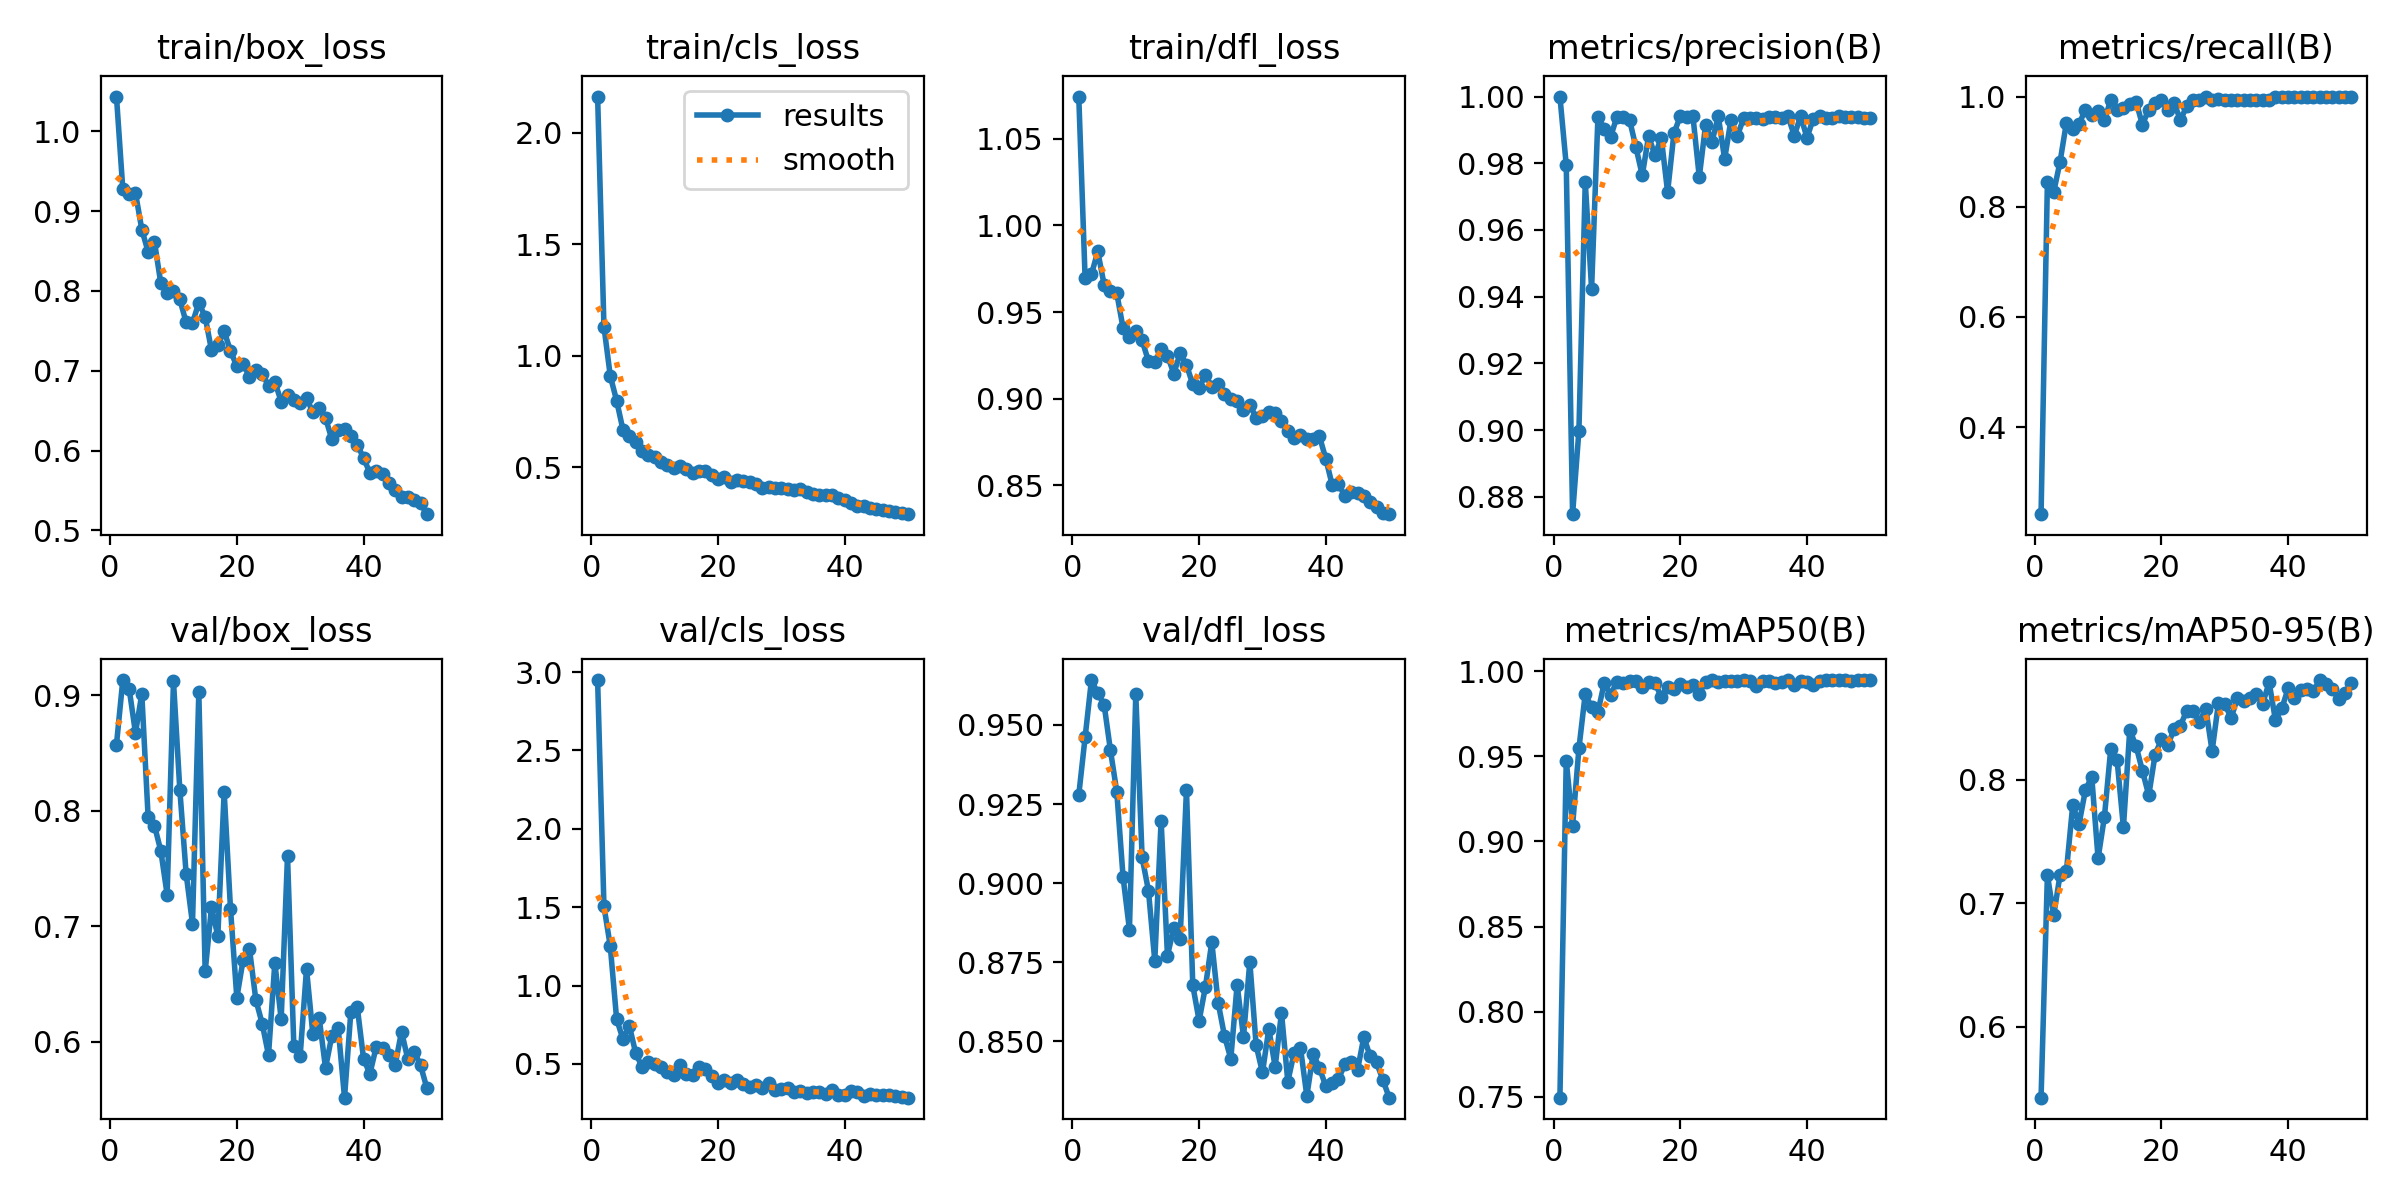

In [7]:
train_results = "/content/runs/detect/train/results.png"

if os.path.exists(train_results):
    img = Image.open(train_results)  # Use PIL to read the image
    display(img)  # Display the image
else:
    print("Training results image not found.")

In [8]:
import pandas as pd

# Load training logs from the results.csv file
df = pd.read_csv("/content/runs/detect/train/results.csv")

# Now your plotting code will work


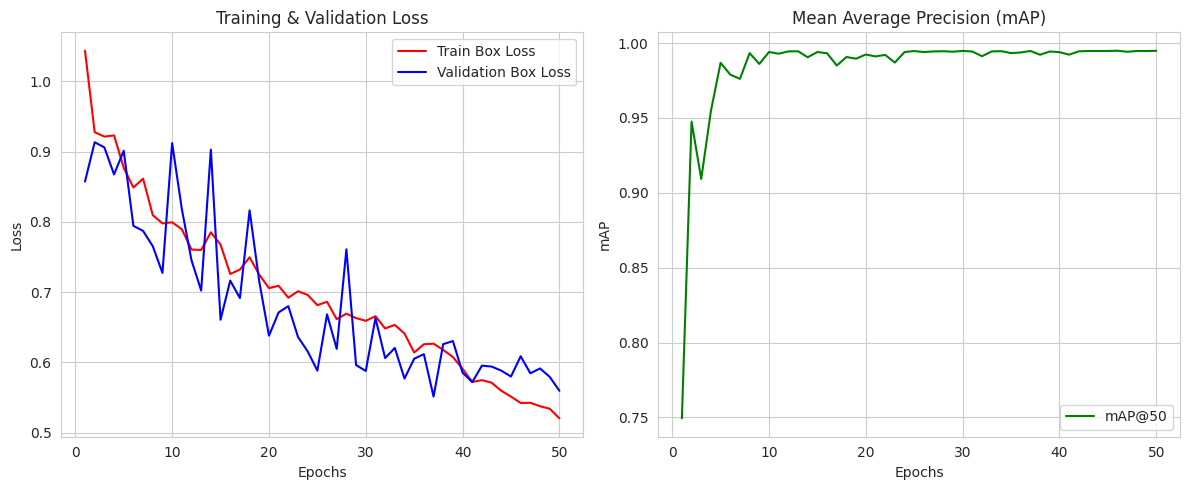

In [9]:
map_column = "metrics/mAP50(B)"
loss_column_train = "train/box_loss"
loss_column_val = "val/box_loss"

plt.figure(figsize=(12, 5))
sns.set_style("whitegrid")

# 📌 Plot Train Loss and Validation Loss
plt.subplot(1, 2, 1)
plt.plot(df["epoch"], df[loss_column_train], label="Train Box Loss", color="red")
plt.plot(df["epoch"], df[loss_column_val], label="Validation Box Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()

# 📌 Plot mAP@50
plt.subplot(1, 2, 2)
plt.plot(df["epoch"], df[map_column], label="mAP@50", color="green")
plt.xlabel("Epochs")
plt.ylabel("mAP")
plt.title("Mean Average Precision (mAP)")
plt.legend()

plt.tight_layout()
plt.show()

In [10]:
import glob  # Import glob for file searching
import pandas as pd

# Find the latest training results CSV file
csv_path = glob.glob("/content/runs/detect/train/results.csv")[-1]  # Get the latest exp folder

# Load the CSV into a DataFrame
df = pd.read_csv(csv_path)

# Now df is ready for plotting!


In [11]:
import glob
import random
import cv2
import os
import matplotlib.pyplot as plt



image 1/1 /content/drive/MyDrive/License-Plate-Dataset/archive/images/train/10c96324-3452-43e2-aa68-c8ae7d3c1b6e___844874771_1_1080x720_maruti-suzuki-wagon-r-vxi-bs-iii-2014-petrol-.jpg.jpg: 608x640 1 license_plate, 83.4ms
Speed: 3.0ms preprocess, 83.4ms inference, 1.9ms postprocess per image at shape (1, 3, 608, 640)

image 1/1 /content/drive/MyDrive/License-Plate-Dataset/archive/images/train/f685e6cf-3a12-42ac-94d7-28cdf129b266___maxresdefault1.jpg.jpg: 640x608 3 license_plates, 106.5ms
Speed: 2.9ms preprocess, 106.5ms inference, 1.2ms postprocess per image at shape (1, 3, 640, 608)

image 1/1 /content/drive/MyDrive/License-Plate-Dataset/archive/images/train/2153dfcb-5968-4bfc-86ba-7ee8ec2d25b1___163231d1425035435-skoda-rapid-tdi-remapped-code-6-tuning-ind-front.jpg.jpg: 512x640 1 license_plate, 76.1ms
Speed: 2.6ms preprocess, 76.1ms inference, 1.2ms postprocess per image at shape (1, 3, 512, 640)

image 1/1 /content/drive/MyDrive/License-Plate-Dataset/archive/images/train/0c9ebe94-

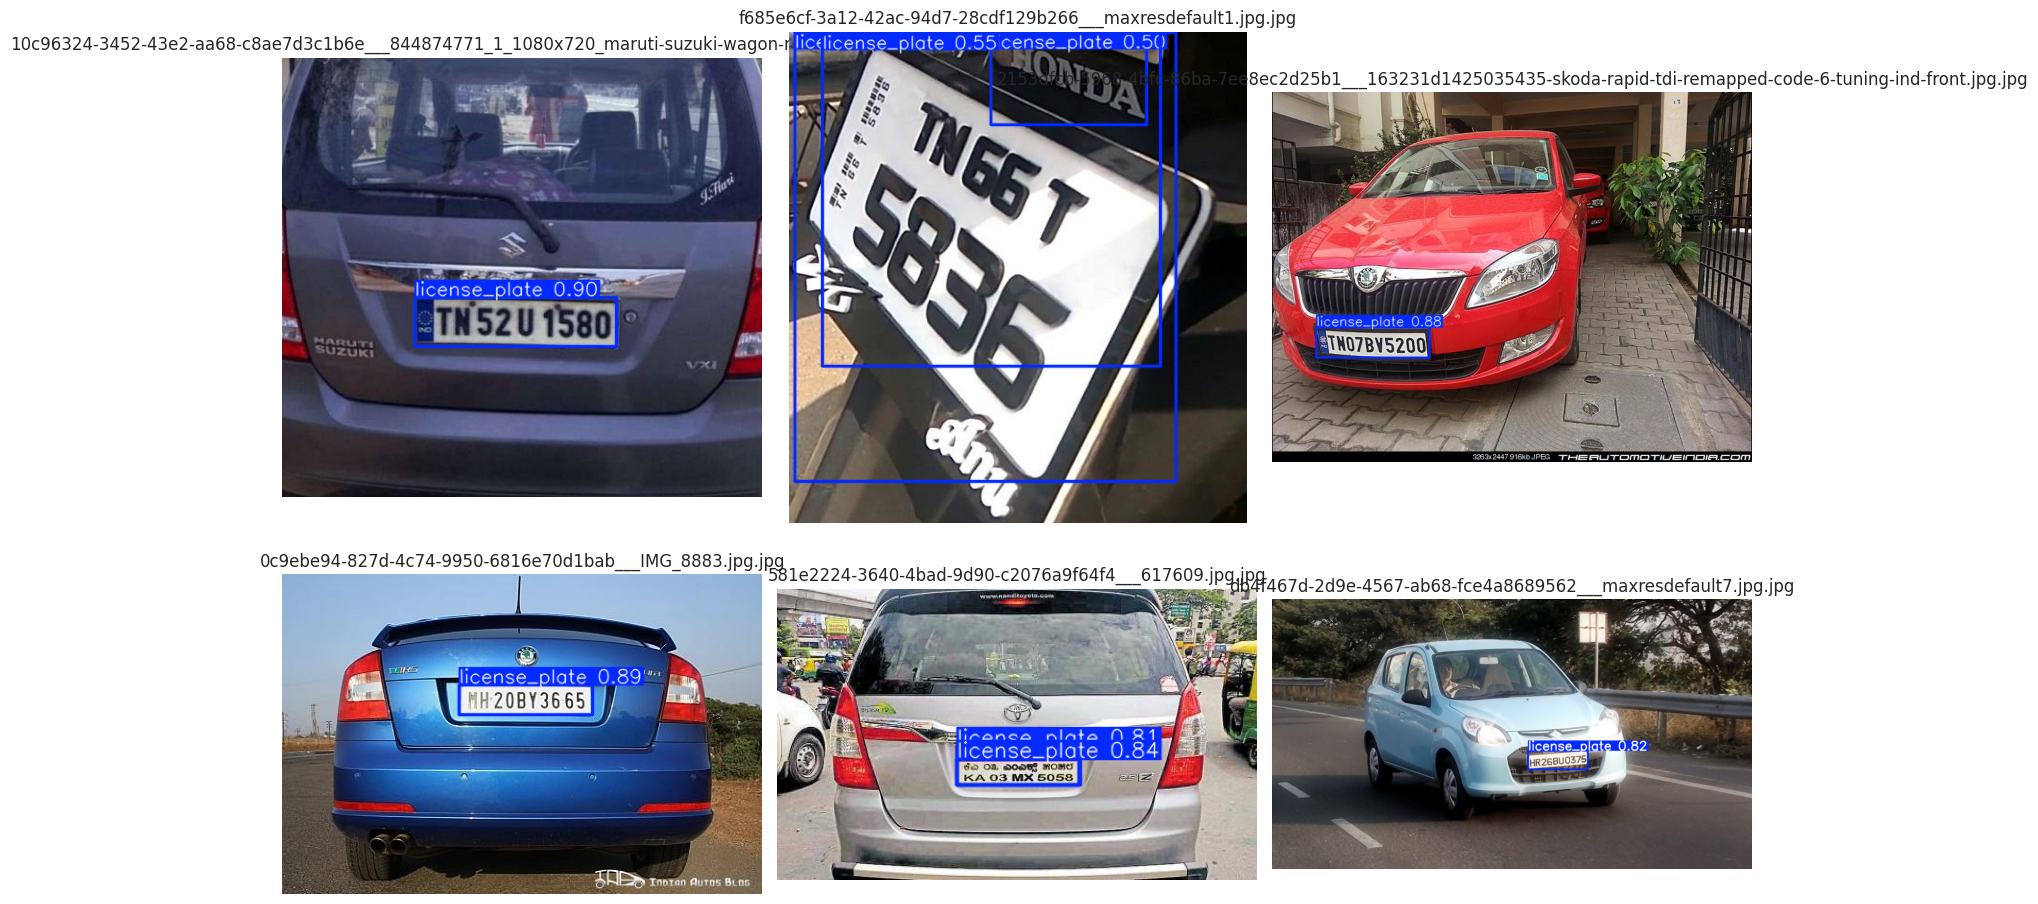

In [18]:
# Collect all images from the directory
all_images = glob.glob("/content/drive/MyDrive/License-Plate-Dataset/archive/images/train/*.jpg.jpg")

num_images = min(6, len(all_images))  # Take the smaller of 6 or total images

# If no images are found, print a message and stop execution
if num_images == 0:
    print("No images found in the directory!")
else:
    # Randomly select images
    test_images = random.sample(all_images, num_images)

    # Create a figure with 2 rows and 3 columns
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))

    for img_path, ax in zip(test_images, axes.flatten()):
        results = model(img_path)      # Run YOLO on the image
        result_img = results[0].plot() # Get the annotated image

        # Convert the annotated image to RGB for plotting
        img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)
        ax.imshow(img_rgb)
        ax.axis("off")
        ax.set_title(os.path.basename(img_path))  # Show the image filename

    plt.tight_layout()
    plt.show()

In [19]:
# Load the trained YOLOv8 model
model_path = "/content/runs/detect/train/weights/best.pt"
model = YOLO(model_path)

# Define input and output video paths
input_video = "/content/drive/MyDrive/License-Plate-Dataset/Screen Recording 2025-03-23 215355.mp4"
output_video = "/content/runs/output_video/output_video.mp4"
compressed_video = "/content/runs/output_video/output_video_compressed.mp4"  # Compressed version

# Open the input video file
cap = cv2.VideoCapture(input_video)

# Get video properties
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
fourcc = cv2.VideoWriter_fourcc(*"mp4v")
out = cv2.VideoWriter(output_video, fourcc, fps, (width, height))

# Process video frame by frame
frame_count = 0
while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Run YOLOv8 on the frame
    results = model(frame, verbose=False)  # No extra logs

    # Draw bounding boxes
    for result in results:
        for box in result.boxes:
            x1, y1, x2, y2 = map(int, box.xyxy[0])
            conf = box.conf[0].item()
            label = f"Plate {conf:.2f}"

            cv2.rectangle(frame, (x1, y1), (x2, y2), (0, 255, 0), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

    # Write frame to output video
    out.write(frame)
    frame_count += 1

# Release video resources
cap.release()
out.release()
cv2.destroyAllWindows()
print(f"✅ Detection completed! Processed {frame_count} frames.")

# ✅ **Compress the video using FFmpeg**
print("⏳ Compressing video... (This may take a few seconds)")
ffmpeg_command = [
    "ffmpeg", "-i", output_video, "-vcodec", "libx264", "-crf", "28", "-preset", "fast", compressed_video
]
subprocess.run(ffmpeg_command, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
print("✅ Compression done!")

# Function to display video in Jupyter Notebook (Kaggle Compatible)
from IPython.display import HTML
from base64 import b64encode

def play_video(file_path, width=800):
    """Display a video file directly in a Jupyter Notebook (Kaggle compatible)."""
    try:
        with open(file_path, "rb") as video_file:
            video_data = video_file.read()
            video_base64 = b64encode(video_data).decode()
    except FileNotFoundError:
        return HTML("<p style='color:red;'>🚨 Error: Video file not found!</p>")

    video_html = f"""
    <video width="{width}" controls autoplay loop>
        <source src="data:video/mp4;base64,{video_base64}" type="video/mp4">
        Your browser does not support the video tag.
    </video>
    """

    return HTML(video_html)

# Display the compressed video
play_video(compressed_video, width=1000)

✅ Detection completed! Processed 417 frames.
⏳ Compressing video... (This may take a few seconds)
✅ Compression done!
